In [3]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt


(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

print("train_image shape:", train_image.shape, "train_label shape:", train_label.shape)

4423680/4422102 [==============================] - 0s 0us/step
train_image shape: (60000, 28, 28) train_label shape: (60000,)


train_image shape: (60000, 28, 28) train_label shape: (60000,)
60000 train set
10000 test set
label = 1 Trouser


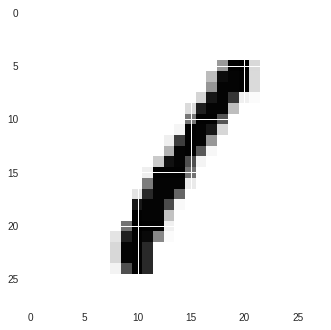

In [2]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("train_image shape:", train_image.shape, "train_label shape:", train_label.shape)


print(train_image.shape[0], 'train set')
print(test_image.shape[0], 'test set')

fashion_mnist_labels = ["T-shirt/top",  
                        "Trouser",      
                        "Pullover",    
                        "Dress",        
                        "Coat",        
                        "Sandal",       
                        "Shirt",       
                        "Sneaker",      
                        "Bag",          
                        "Ankle boot"]   

# any number between 0 and 59,999
img_index = 3
# the lables, ranging from 0 to 9
label_index = train_label[img_index]

print ("label = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# Show an image
plt.imshow(train_image[img_index])




In [0]:
train_image = train_image.astype('float32') / 255
test_image = test_image.astype('float32') / 255

print("Number of train data - " + str(len(train_image)))
print("Number of test data - " + str(len(test_image)))


Number of train data - 60000
Number of test data - 10000


In [0]:
#Split the data into train/validation/test data sets
(train_image, valid_image) = train_image[5000:], train_image[:5000] 
(train_label, valid_label) = train_label[5000:], train_label[:5000]


w, h = 28, 28
train_image = train_image.reshape(train_image.shape[0], w, h, 1)
valid_image = valid_image.reshape(valid_image.shape[0], w, h, 1)
test_image = test_image.reshape(test_image.shape[0], w, h, 1)


train_label = tf.keras.utils.to_categorical(train_label, 10)
valid_label = tf.keras.utils.to_categorical(valid_label, 10)
test_label = tf.keras.utils.to_categorical(test_label, 10)


print("train_image shape:", train_image.shape, "train_label shape:", train_label.shape)


print(train_image.shape[0], 'train set')
print(valid_image.shape[0], 'validation set')
print(test_image.shape[0], 'test set')



train_image shape: (55000, 28, 28, 1) train_label shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [0]:
model = tf.keras.Sequential()


model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
print(model.output_shape)
print(model.input_shape)
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
print(model.output_shape)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))



(None, 28, 28, 32)
(None, 28, 28, 1)
(None, 7, 7, 64)


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
history=model.fit(train_image,
         train_label,
         batch_size=64,
         epochs=5,
         validation_data=(valid_image, valid_label),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
54976/55000 [============================>.] - ETA: 0s - loss: 0.6146 - acc: 0.7730
Epoch 00001: val_loss improved from inf to 0.40605, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 71s 1ms/step - loss: 0.6146 - acc: 0.7730 - val_loss: 0.4060 - val_acc: 0.8580
Epoch 2/5
54976/55000 [============================>.] - ETA: 0s - loss: 0.4419 - acc: 0.8400
Epoch 00002: val_loss improved from 0.40605 to 0.33494, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 71s 1ms/step - loss: 0.4421 - acc: 0.8399 - val_loss: 0.3349 - val_acc: 0.8810
Epoch 3/5
54976/55000 [============================>.] - ETA: 0s - loss: 0.3928 - acc: 0.8555
Epoch 00003: val_loss improved from 0.33494 to 0.30667, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 71s 1ms/step - loss: 0.3928 - acc: 0.8555 - val_loss: 0.3067 - val_acc: 0.8882
Epoch 4

In [0]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss’]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

SyntaxError: ignored

In [0]:
model.load_weights('model.weights.best.hdf5')

acc = model.evaluate(test_image, test_label, verbose=0)
print('\n', 'Test accuracy:', acc[1])



 Test accuracy: 0.8942


In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss’]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

SyntaxError: ignored

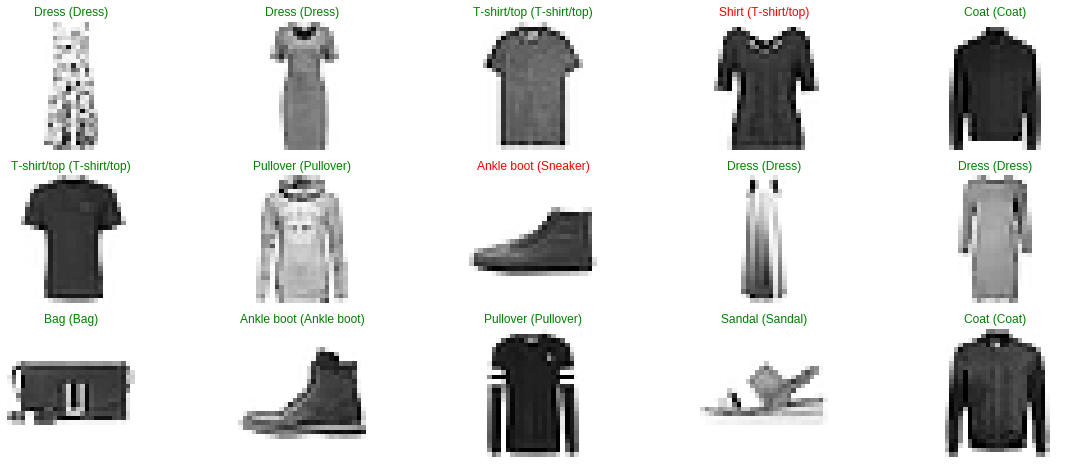

In [0]:
predictions = model.predict(test_image)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_image.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    #Show image
    ax.imshow(np.squeeze(test_image[index]))
    predict_index = np.argmax(predictions[index])
    true_index = np.argmax(test_label[index])
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
